# Compare Methods for Calculating Intensities
We now have two alternate methods for determining intensity from simulation data based on a given map of absorption co-efficients.

In [1]:
from inverse_modelling_tfo.data.generate_intensity import intensity_from_distribution, intensity_from_raw
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
fred = Path(r'..\data\distribution_bin_count_effect\fa_1_wv_1_sa_0.1_ns_9_ms_5.csv') 
raw = Path(r'..\data\raw\fa_1_wv_1_sa_0.1_ns_1_ms_5.pkl')

In [3]:
# %matplotlib widget

Check if the files are correct

In [4]:
print(fred.exists())
print(raw.exists())

True
True


## Calculate Intensity

In [30]:
mu_map_fred = {1: 0.0017, 2: 0.00085, 3: 0.0016, 4: 0.00125, 5: 0.00157, 6: 0.00175, 7: 0.015058259000000002, 8: 0.00187}
# mu_map_raw = {1: 0.0017, 2: 0.00085, 3: 0.0016, 4: 0.00125, 5: 0.00157, 6: 0.00175, 7: 0.015058259000000002, 8: 0.00187}
mu_map_raw = {1: 0.017, 2: 0.0085, 3: 0.016, 4: 0.0125, 5: 0.0157, 6: 0.0175, 7: 0.15058259000000002, 8: 0.0187}

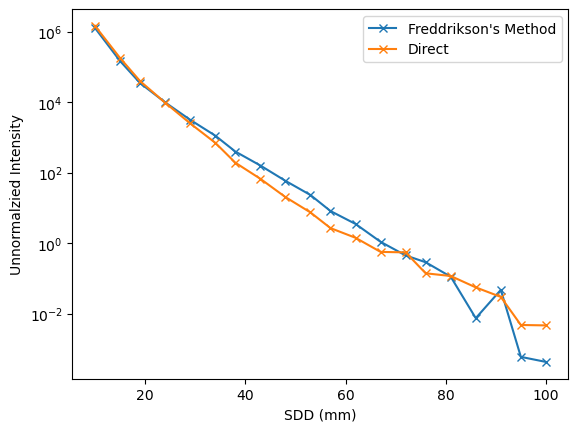

In [5]:
fred_intensity_data = intensity_from_distribution(fred, mu_map_fred)
raw_intensity_data = intensity_from_raw(raw, mu_map_raw)

plt.plot(fred_intensity_data['SDD'], fred_intensity_data['Intensity'], label="Freddrikson's Method", marker='x')
plt.plot(raw_intensity_data['SDD'], raw_intensity_data['Intensity'], label="Direct", marker='x')


plt.xlabel('SDD (mm)')
plt.ylabel('Unnormalzied Intensity')
plt.yscale('log')
plt.legend()
plt.show()

## Log Difference For changing Mu A
How does the log difference between these two methods stack up when we make changes to mu_a. We choose log difference because of the exponential nature of light intensity. For a linnear scale, the close detectors would make large contributions whereas the far ones would not make much of an effect. But we are, in the end, concerned about the shape of these curves(in log).  

The log shapes look really weird at the far detectors, where the number of photons is really low. Dismissing the last 4 points for error calculation.  

This part of the code takes a while to run

## Testing with Layer 1

In [31]:
mu_map_fred = {1: 0.0017, 2: 0.00085, 3: 0.0016, 4: 0.00125, 5: 0.00157, 6: 0.00175, 7: 0.015058259000000002, 8: 0.00187}
mu_map_raw = {1: 0.017, 2: 0.0085, 3: 0.016, 4: 0.0125, 5: 0.0157, 6: 0.0175, 7: 0.15058259000000002, 8: 0.0187}

In [18]:
test_mu = np.arange(0.01, 0.08, 0.005)
errors = []
test_layer = 1

for mu in test_mu:
    mu_map_fred[test_layer] = mu * 0.1
    mu_map_raw[test_layer] = mu
    fred_intensity_data = intensity_from_distribution(fred, mu_map_fred)
    raw_intensity_data = intensity_from_raw(raw, mu_map_raw)
    log_error = np.mean(np.abs(np.log(fred_intensity_data['Intensity'].to_numpy()[:16]) - np.log(raw_intensity_data['Intensity'].to_numpy()[:16])))
    errors.append(log_error)


In [19]:
error_table = pd.DataFrame({"Mu_a" : test_mu, "MAE(log)": errors})
error_table

,Mu_a,MAE(log)
0,0.010,0.488033
1,0.015,0.522425
2,0.020,0.566632
3,0.025,0.628824
4,0.030,0.717834
5,0.035,0.814203
6,0.040,0.907302
7,0.045,0.997366
8,0.050,1.084608
9,0.055,1.169216


Error increases as with stronger absorption. Lets see how these curves stack up against each other

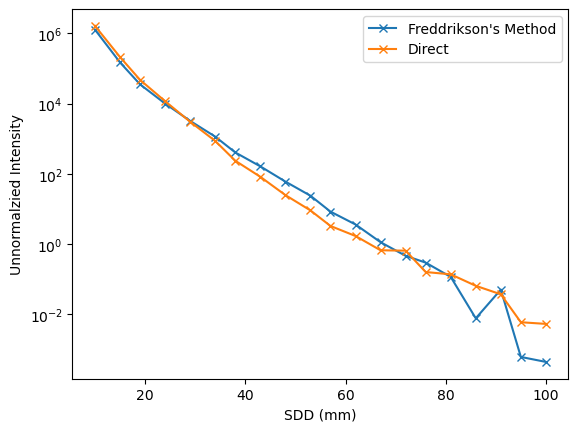

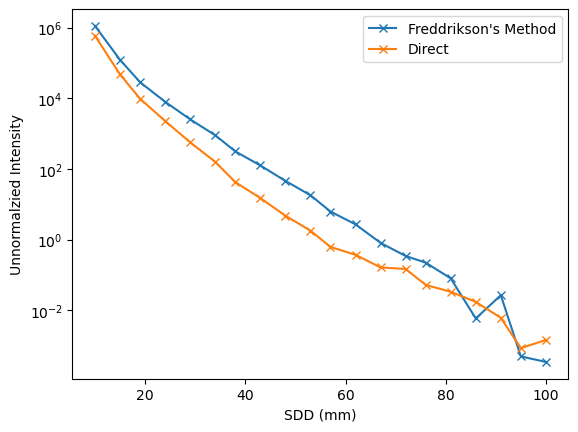

In [20]:
for mu in [0.01, 0.08]:
    mu_map_fred[test_layer] = mu * 0.1
    mu_map_raw[test_layer] = mu
    fred_intensity_data = intensity_from_distribution(fred, mu_map_fred)
    raw_intensity_data = intensity_from_raw(raw, mu_map_raw)
    plt.figure()
    plt.plot(fred_intensity_data['SDD'], fred_intensity_data['Intensity'], label="Freddrikson's Method", marker='x')
    plt.plot(raw_intensity_data['SDD'], raw_intensity_data['Intensity'], label="Direct", marker='x')
    plt.xlabel('SDD (mm)')
    plt.ylabel('Unnormalzied Intensity')
    plt.yscale('log')
    plt.legend()
    
    

## Testing with Layer 7(Fetal)

In [32]:
mu_map_fred = {1: 0.0017, 2: 0.00085, 3: 0.0016, 4: 0.00125, 5: 0.00157, 6: 0.00175, 7: 0.015058259000000002, 8: 0.00187}
mu_map_raw = {1: 0.017, 2: 0.0085, 3: 0.016, 4: 0.0125, 5: 0.0157, 6: 0.0175, 7: 0.15058259000000002, 8: 0.0187}

In [33]:
test_mu = np.arange(0.1, 0.3, 0.05)
errors = []
test_layer = 7

for mu in test_mu:
    mu_map_fred[test_layer] = mu * 0.1
    mu_map_raw[test_layer] = mu
    fred_intensity_data = intensity_from_distribution(fred, mu_map_fred)
    raw_intensity_data = intensity_from_raw(raw, mu_map_raw)
    log_error = np.mean(np.abs(np.log(fred_intensity_data['Intensity'].to_numpy()[:16]) - np.log(raw_intensity_data['Intensity'].to_numpy()[:16])))
    errors.append(log_error)

In [34]:
error_table = pd.DataFrame({"Mu_a" : test_mu, "MAE(log)": errors})
error_table

,Mu_a,MAE(log)
0,0.10,0.526662
1,0.15,0.537811
2,0.20,0.544235
3,0.25,0.548406


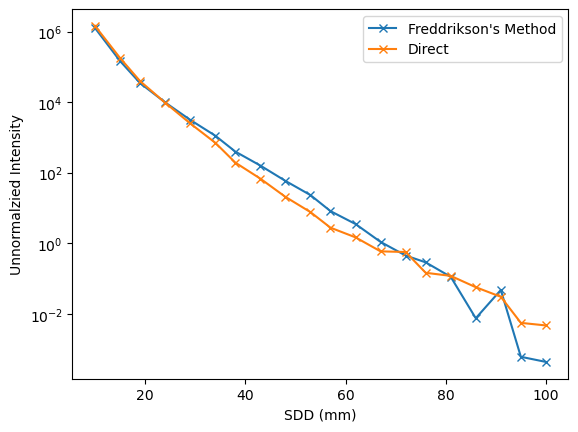

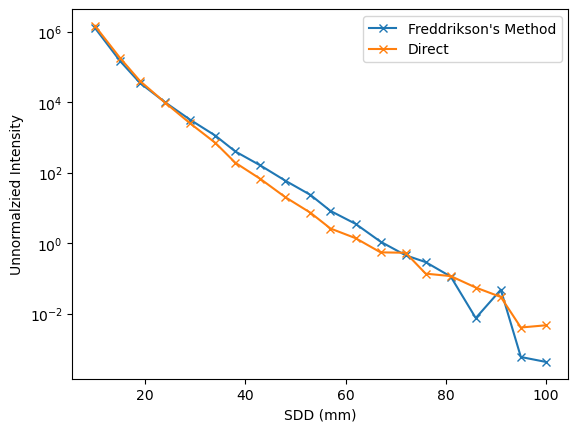

In [35]:
for mu in [0.1, 0.25]:
    mu_map_fred[test_layer] = mu * 0.1
    mu_map_raw[test_layer] = mu
    fred_intensity_data = intensity_from_distribution(fred, mu_map_fred)
    raw_intensity_data = intensity_from_raw(raw, mu_map_raw)
    plt.figure()
    plt.plot(fred_intensity_data['SDD'], fred_intensity_data['Intensity'], label="Freddrikson's Method", marker='x')
    plt.plot(raw_intensity_data['SDD'], raw_intensity_data['Intensity'], label="Direct", marker='x')
    plt.xlabel('SDD (mm)')
    plt.ylabel('Unnormalzied Intensity')
    plt.yscale('log')
    plt.legend()

## Timing Analysis
How long does it take to generate intensities from each type of outputs?

In [37]:
import timeit
t1 = timeit.Timer(lambda: intensity_from_raw(raw, mu_map_raw))
print("Time for Direct", t1.timeit(10))

Time for Direct 22.301556099992013


In [38]:
t2 = timeit.Timer(lambda: intensity_from_distribution(fred, mu_map_fred))
print("Time for Freddrikson", t2.timeit(10))

Time for Freddrikson 0.1667072999989614
